Разбор дата сета - HOUSING

In [0]:
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
from IPython.display import Image

In [0]:
HOUSING_PATH = "housing.csv"

In [0]:
housing = pd.read_csv(HOUSING_PATH)
housing.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY

#### Эксплоративный анализ

1. longitude: A measure of how far west a house is; a higher value is farther west
2. latitude: A measure of how far north a house is; a higher value is farther north
3. housingMedianAge: Median age of a house within a block; a lower number is a newer building
4. totalRooms: Total number of rooms within a block
5. totalBedrooms: Total number of bedrooms within a block
6. population: Total number of people residing within a block
7. households: Total number of households, a group of people residing within a home unit, for a block
8. medianIncome: Median income for households within a block of houses (measured in tens of thousands of US Dollars)
9. medianHouseValue: Median house value for households within a block (measured in US Dollars)
10. oceanProximity: Location of the house w.r.t ocean/sea

In [0]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [0]:
# категориальные переменные
housing["ocean_proximity"].value_counts()


# просуммировать и поделить на общее число, получить долю от общего числа данных
#housing["ocean_proximity"].value_counts(normalize = True) 

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [0]:
housing.describe()

longitude      latitude  housing_median_age   total_rooms  \
count  20640.000000  20640.000000        20640.000000  20640.000000   
mean    -119.569704     35.631861           28.639486   2635.763081   
std        2.003532      2.135952           12.585558   2181.615252   
min     -124.350000     32.540000            1.000000      2.000000   
25%     -121.800000     33.930000           18.000000   1447.750000   
50%     -118.490000     34.260000           29.000000   2127.000000   
75%     -118.010000     37.710000           37.000000   3148.000000   
max     -114.310000     41.950000           52.000000  39320.000000   

       total_bedrooms    population    households  median_income  \
count    20433.000000  20640.000000  20640.000000   20640.000000   
mean       537.870553   1425.476744    499.539680       3.870671   
std        421.385070   1132.462122    382.329753       1.899822   
min          1.000000      3.000000      1.000000       0.499900   
25%        296.000000    787.000000    280.000000       2.563400   
50%        435.000000   1166.000000    409.000000       3.534800   
75%        647.000000   1725.000000    605.000000       4.743250   
max       6445.000000  35682.000000   6082.000000      15.000100   

       median_house_value  
count        20640.000000  
mean        206855.816909  
std         115395.615874  
min          14999.000000  
25%         119600.000000  
50%         179700.000000  
75%         264725.000000  
max         500001.000000

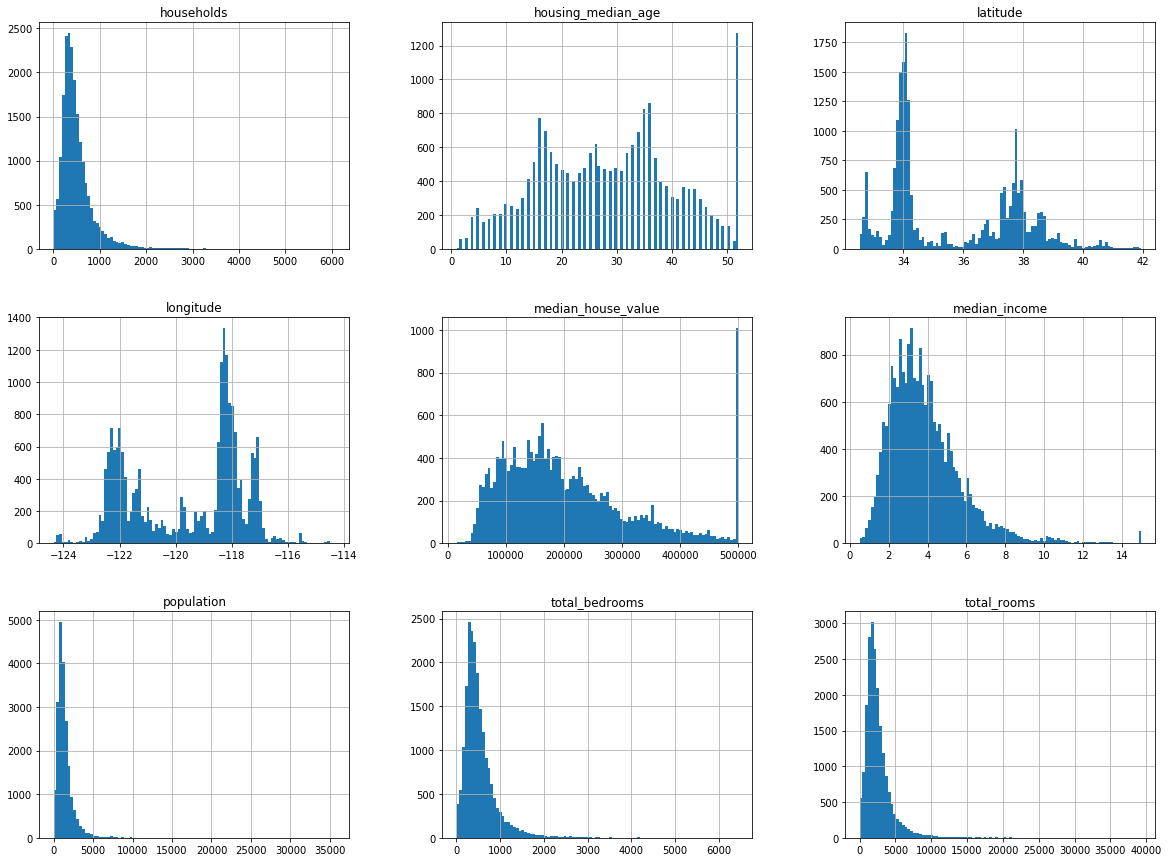

In [0]:
housing.hist(bins=100, figsize=(20,15))
plt.show()

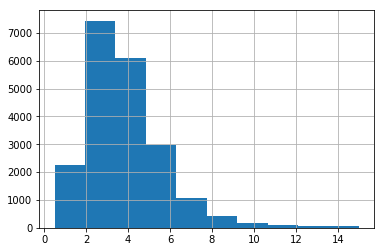

In [0]:
housing.median_income.hist()
plt.show()

#### Визуализация

In [0]:
# housing = strat_train_set.copy()

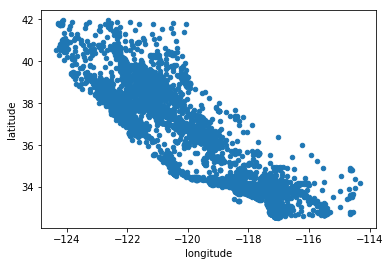

In [0]:
_ = housing.plot(kind="scatter", x="longitude", y="latitude")

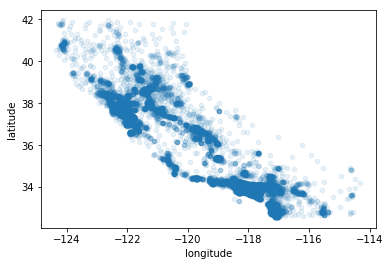

In [0]:
_ = housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1)

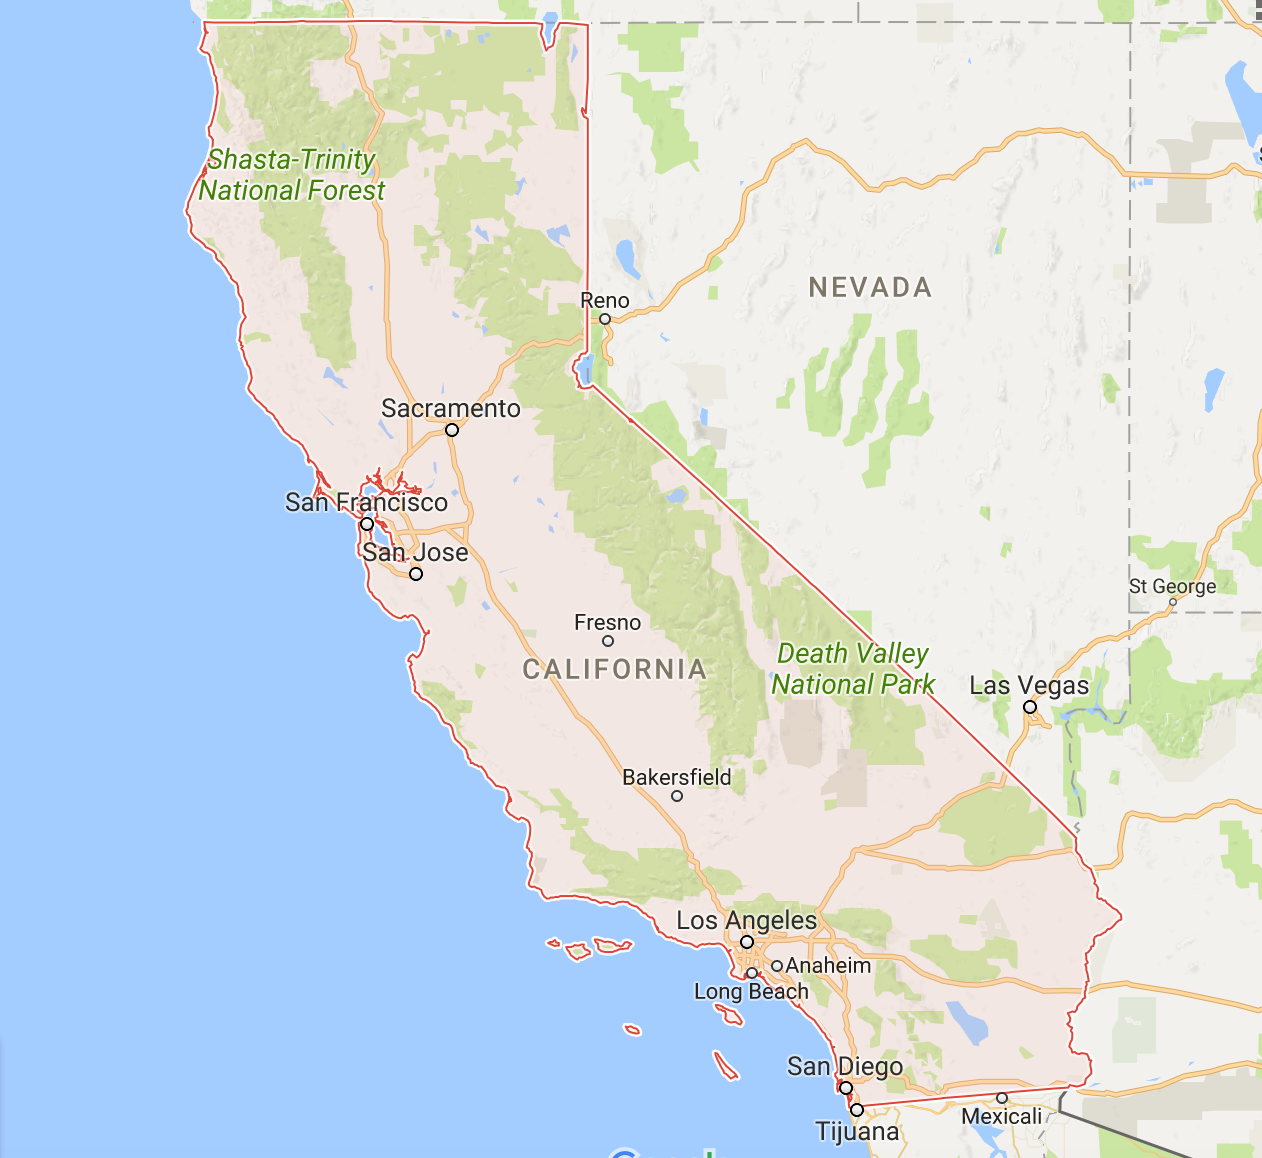

In [0]:
Image('calfornia.png')

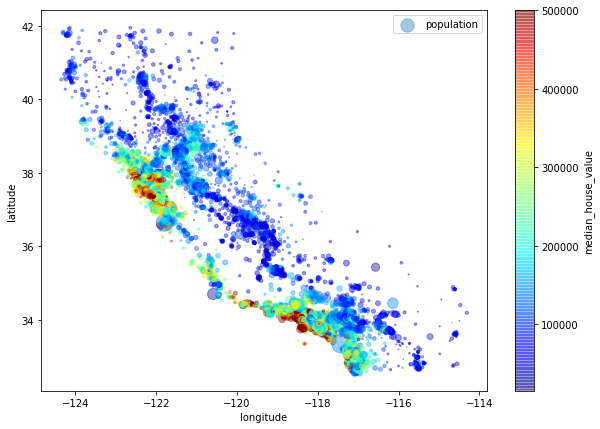

In [0]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
    s=housing["population"]/100, label="population", figsize=(10,7),
    c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,
    sharex=False)
_ = plt.legend()

In [0]:
# housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
#     s=housing["population"]/100, label="population", figsize=(10,7),
#     c="ocean_proximity_num", cmap=plt.get_cmap("jet"), colorbar=True,
#     sharex=False)
# _ = plt.legend()

In [0]:
corr_matrix = housing.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687160
total_rooms           0.135097
housing_median_age    0.114110
households            0.064506
total_bedrooms        0.047689
population           -0.026920
longitude            -0.047432
latitude             -0.142724
Name: median_house_value, dtype: float64

In [0]:
corr_matrix

longitude  latitude  housing_median_age  total_rooms  \
longitude            1.000000 -0.924478           -0.105848     0.048871   
latitude            -0.924478  1.000000            0.005766    -0.039184   
housing_median_age  -0.105848  0.005766            1.000000    -0.364509   
total_rooms          0.048871 -0.039184           -0.364509     1.000000   
total_bedrooms       0.076598 -0.072419           -0.325047     0.929379   
population           0.108030 -0.115222           -0.298710     0.855109   
households           0.063070 -0.077647           -0.306428     0.918392   
median_income       -0.019583 -0.075205           -0.111360     0.200087   
median_house_value  -0.047432 -0.142724            0.114110     0.135097   

                    total_bedrooms  population  households  median_income  \
longitude                 0.076598    0.108030    0.063070      -0.019583   
latitude                 -0.072419   -0.115222   -0.077647      -0.075205   
housing_median_age       -0.325047   -0.298710   -0.306428      -0.111360   
total_rooms               0.929379    0.855109    0.918392       0.200087   
total_bedrooms            1.000000    0.876320    0.980170      -0.009740   
population                0.876320    1.000000    0.904637       0.002380   
households                0.980170    0.904637    1.000000       0.010781   
median_income            -0.009740    0.002380    0.010781       1.000000   
median_house_value        0.047689   -0.026920    0.064506       0.687160   

                    median_house_value  
longitude                    -0.047432  
latitude                     -0.142724  
housing_median_age            0.114110  
total_rooms                   0.135097  
total_bedrooms                0.047689  
population                   -0.026920  
households                    0.064506  
median_income                 0.687160  
median_house_value            1.000000

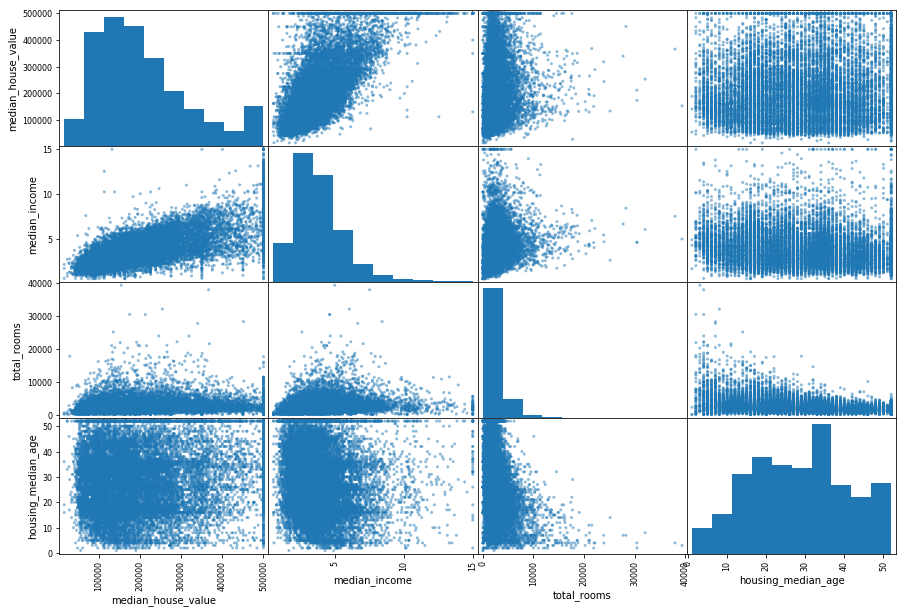

In [0]:
attributes = ["median_house_value", "median_income", "total_rooms", "housing_median_age"]
_ = scatter_matrix(housing[attributes], figsize=(15, 10))

[0, 16, 0, 550000]

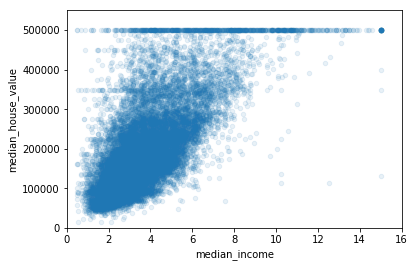

In [0]:
housing.plot(kind="scatter", x="median_income", y="median_house_value", alpha=0.1)
plt.axis([0, 16, 0, 550000])

In [0]:
housing["rooms_per_household"] = housing["total_rooms"]/housing["households"]
housing["bedrooms_per_room"] = housing["total_bedrooms"]/housing["total_rooms"]
housing["population_per_household"]=housing["population"]/housing["households"]

In [0]:
housing.population_per_household.describe()

count    16512.000000
mean         3.096437
std         11.584826
min          0.692308
25%          2.431287
50%          2.817653
75%          3.281420
max       1243.333333
Name: population_per_household, dtype: float64

In [0]:
housing["population_per_household"].describe(percentiles=[0.999])

count    16512.000000
mean         3.096437
std         11.584826
min          0.692308
50%          2.817653
99.9%       13.050699
max       1243.333333
Name: population_per_household, dtype: float64

In [0]:
corr_matrix = housing.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.687160
rooms_per_household         0.146285
total_rooms                 0.135097
housing_median_age          0.114110
households                  0.064506
total_bedrooms              0.047689
population_per_household   -0.021985
population                 -0.026920
longitude                  -0.047432
latitude                   -0.142724
bedrooms_per_room          -0.259984
Name: median_house_value, dtype: float64

#### Обработка нулевых/пропущенных значений

In [0]:
housing.total_bedrooms.value_counts().iloc[:10]

280.0    55
331.0    51
345.0    50
393.0    49
343.0    49
348.0    48
328.0    48
394.0    48
272.0    47
309.0    47
Name: total_bedrooms, dtype: int64

In [0]:
# housing['total_bedrooms2'] = housing.total_bedrooms.fillna(value = housing.total_bedrooms.median())

housing.total_bedrooms2 = housing.total_bedrooms.fillna(value = 45).value_counts(dropna = False).iloc[:10]

/Users/k.gusev/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  """Entry point for launching an IPython kernel.


In [0]:
housing.total_bedrooms2.mean()

65.7

In [0]:
housing.total_bedrooms.median()

435.0

In [0]:
# housing[['ocean_proximity', 'total_bedrooms']].groupby('ocean_proximity').count()

total_bedrooms
ocean_proximity                
<1H OCEAN                  9034
INLAND                     6496
ISLAND                        5
NEAR BAY                   2270
NEAR OCEAN                 2628

In [0]:
# housing[['ocean_proximity', 'total_bedrooms']].groupby('ocean_proximity').mean()

#### Категорийные атрибуты

Пример категорийного атрибута - 'ocean_proximity'.
В зависимости от типа данных, такие атрибуты преобразуются либо в порядковые значения (нам важно указать порядок), либо в бинарные параметры.

Например, атрибут "расстояние" со значениеми ['близко', 'средне', 'далеко'] можно преобразовать в атрибут со значениями [0,2,3], либо в три новых атрибута "расстояние_близко", "расстояние_среднее", "расстояние_далеко" со значениями 1/0.


In [0]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

In [0]:
encoder = LabelEncoder()
housing_cat = housing["ocean_proximity"]
housing_cat_encoded = encoder.fit_transform(housing_cat)

In [0]:
housing_cat_encoded

array([3, 3, 3, ..., 1, 1, 1])

In [0]:
housing["ocean_proximity_num"] = housing_cat_encoded

In [0]:
encoder = OneHotEncoder()
housing_cat_1hot = encoder.fit_transform(housing_cat_encoded.reshape(-1,1))
housing_cat_1hot.toarray() 

/Users/k.gusev/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_encoders.py:368: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


array([[0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       ...,
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

In [0]:
pd.get_dummies(housing["ocean_proximity"]).head()

<1H OCEAN  INLAND  ISLAND  NEAR BAY  NEAR OCEAN
0          0       0       0         1           0
1          0       0       0         1           0
2          0       0       0         1           0
3          0       0       0         1           0
4          0       0       0         1           0

#### Масштабирование данных 

Зачем масштабировать данные?
Многие алгоритмы машинного обучения чувствительны к масштабированию данных. К таким алгоритмам, например, относится метод ближайших соседей, машина опорных векторов и др.

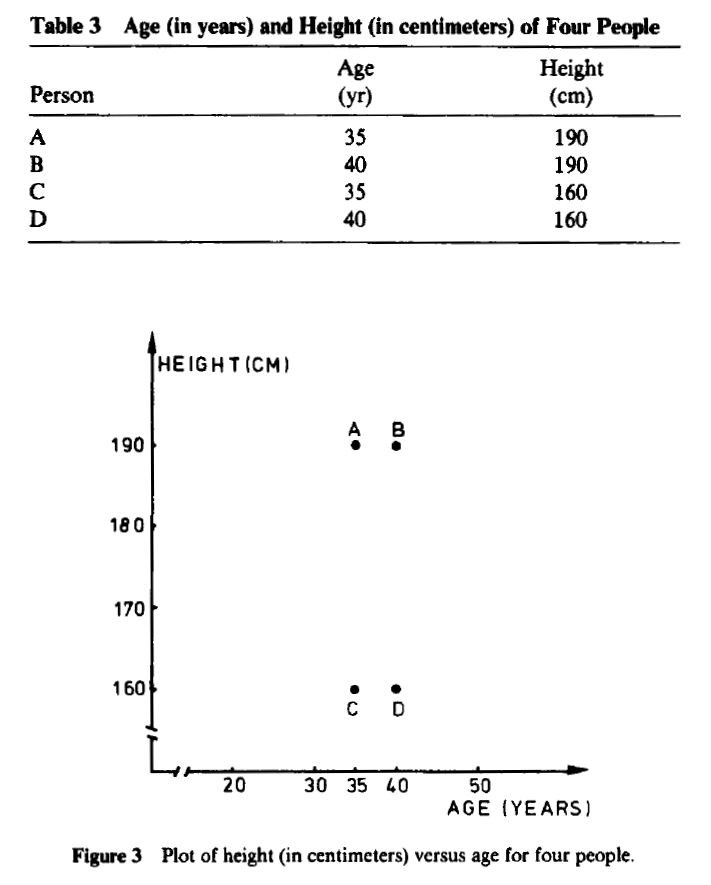

In [0]:
Image('Ppu5Y.png')

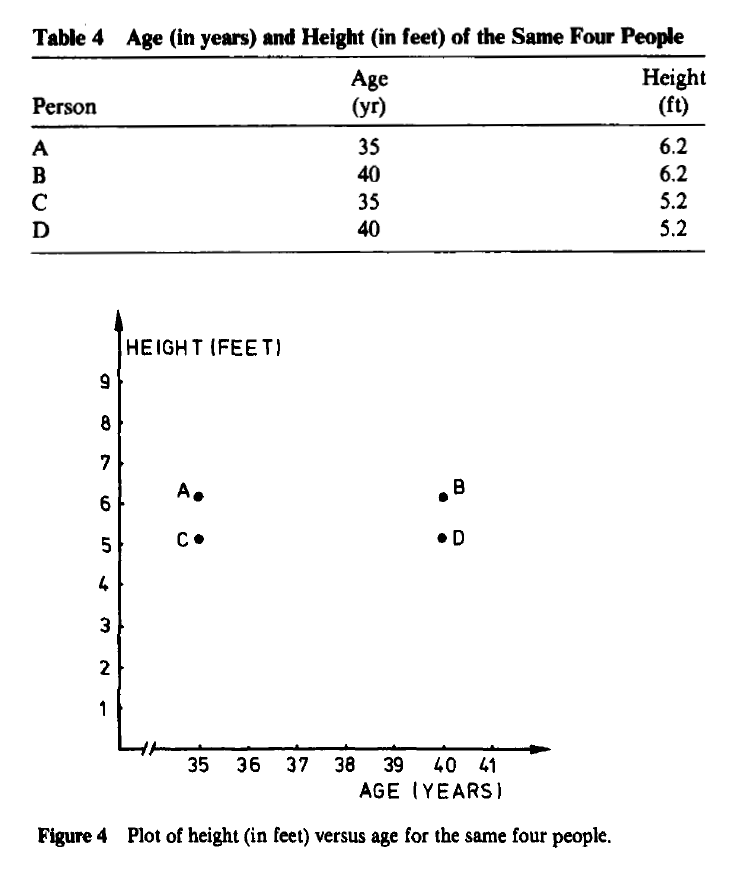

In [0]:
Image('zW6rI.png')

..

### Создание из непрерывной - категориальной фичи

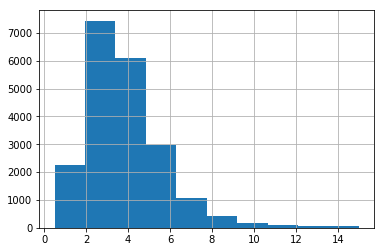

In [0]:
housing["median_income"].hist()

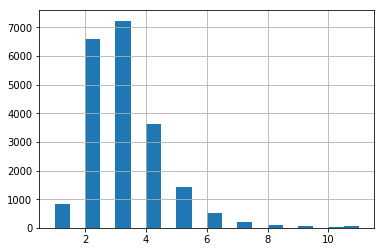

In [0]:
#деление на 1.5 и округление до целой части
housing["income_cat"] = np.ceil(housing["median_income"] / 1.5)
housing["income_cat"].hist(bins=20)

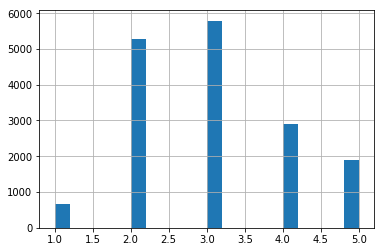

In [0]:
housing["income_cat"].where(housing["income_cat"] < 5, 5.0, inplace=True)
housing["income_cat"].hist(bins=20)

In [0]:
pass